The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


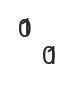

In [10]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import dataframe_image as dfi
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
f,a = plt.subplots(1,1,figsize=(1e-2, 1e-2))
mpl.rcParams['figure.dpi'] = 180
sns.set_style('darkgrid')
import os,sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import warnings
warnings.filterwarnings("ignore")

from tqdm.auto import tqdm
from datetime import datetime as dt
from src.utils import mkdirs, convert_path, pkl_dump, pkl_load, display_side, add_median_labels
from src.data_processing import get_dataset
from src.sklearn_train_eval import nested_kcv_train_sklearn, evaluate_trained_models_sklearn
from src.metrics import get_predictions, get_roc, get_metrics, plot_roc_auc_fold, get_mean_roc_curve

In [11]:
cedar_aligned = pd.read_csv('../data/aligned_icore/230418_cedar_aligned.csv')


In [20]:
from sklearn.ensemble import RandomForestClassifier
kwargs_norank = {'max_len': 12,
                 'encoding': 'onehot',
                 'blosum_matrix': None,
                 'mask': False,
                 'add_rank': False,
                 'seq_col':'icore_mut',
                 'rank_col':'',
                 'hla_col':'HLA',
                 'invert':False,
                 'add_aaprop': False,
                 'remove_pep': False,
                 'standardize': True}
# Using the same model and hyperparameters
model = RandomForestClassifier(n_jobs=1, min_samples_leaf=7, n_estimators=300,
                               max_depth=8, ccp_alpha=9.945e-6)
# Training model and getting feature importances
print('Training')
trained_models, train_metrics, _ = nested_kcv_train_sklearn(cedar_aligned, model,
                                                            ics_dict=None,
                                                            encoding_kwargs=kwargs_norank,
                                                            n_jobs=8)
_, icore_preds_norank = evaluate_trained_models_sklearn(cedar_aligned,
                                           trained_models, None,
                                           cedar_aligned,
                                           kwargs_norank, concatenated=False,
                                           only_concat=False, n_jobs=8, kcv_eval=True)

Training


Train:Outer fold:   0%|          | 0/10 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Eval Folds:   0%|          | 0/10 [00:00<?, ?it/s]

In [21]:


kwargs_withrank = {'max_len': 12,
                   'encoding': 'onehot',
                   'blosum_matrix': None,
                   'mask': False,
                   'add_rank': True,
                   'seq_col':'icore_mut',
                   'rank_col':'EL_rank_mut',
                   'hla_col':'HLA',
                   'invert':False,
                   'add_aaprop': False,
                   'remove_pep': False,
                   'standardize': True}
# Using the same model and hyperparameters
model = RandomForestClassifier(n_jobs=1, min_samples_leaf=7, n_estimators=300,
                               max_depth=8, ccp_alpha=9.945e-6)
# Training model and getting feature importances
print('Training')
trained_models, train_metrics, _ = nested_kcv_train_sklearn(cedar_aligned, model,
                                                            ics_dict=None,
                                                            encoding_kwargs=kwargs_withrank,
                                                            n_jobs=8)
_, icore_preds_withrank = evaluate_trained_models_sklearn(cedar_aligned,
                                           trained_models, None,
                                           cedar_aligned,
                                           kwargs_withrank, concatenated=False,
                                           only_concat=False, n_jobs=8, kcv_eval=True)

Training


Train:Outer fold:   0%|          | 0/10 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Eval Folds:   0%|          | 0/10 [00:00<?, ?it/s]

In [19]:
from sklearn.metrics import roc_auc_score

print(f"RF model ICORE, (no rank):\tAUC={roc_auc_score(preds_norank['agg_label'].values, preds_norank['mean_pred'].values):.4f}")
print(f"RF model ICORE, (W/ rank):\tAUC={roc_auc_score(preds_withrank['agg_label'].values, preds_withrank['mean_pred'].values):.4f}")

RF model ICORE, (no rank):	AUC=0.6788
RF model ICORE, (W/ rank):	AUC=0.7136


In [26]:
from sklearn.ensemble import RandomForestClassifier
kwargs_norank = {'max_len': 12,
                 'encoding': 'onehot',
                 'blosum_matrix': None,
                 'mask': False,
                 'add_rank': False,
                 'seq_col':'Peptide',
                 'rank_col':'',
                 'hla_col':'HLA',
                 'invert':False,
                 'add_aaprop': False,
                 'remove_pep': False,
                 'standardize': True}
# Using the same model and hyperparameters
model = RandomForestClassifier(n_jobs=1, min_samples_leaf=7, n_estimators=300,
                               max_depth=8, ccp_alpha=9.945e-6)
# Training model and getting feature importances
print('Training')
trained_models, train_metrics, _ = nested_kcv_train_sklearn(cedar_aligned, model,
                                                            ics_dict=None,
                                                            encoding_kwargs=kwargs_norank,
                                                            n_jobs=8)
_, preds_norank = evaluate_trained_models_sklearn(cedar_aligned,
                                           trained_models, None,
                                           cedar_aligned,
                                           kwargs_norank, concatenated=False,
                                           only_concat=False, n_jobs=8, kcv_eval=True)

Training


Train:Outer fold:   0%|          | 0/10 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Eval Folds:   0%|          | 0/10 [00:00<?, ?it/s]

In [22]:


kwargs_withrank = {'max_len': 12,
                   'encoding': 'onehot',
                   'blosum_matrix': None,
                   'mask': False,
                   'add_rank': True,
                   'seq_col':'Peptide',
                   'rank_col':'trueHLA_EL_rank',
                   'hla_col':'HLA',
                   'invert':False,
                   'add_aaprop': False,
                   'remove_pep': False,
                   'standardize': True}
# Using the same model and hyperparameters
model = RandomForestClassifier(n_jobs=1, min_samples_leaf=7, n_estimators=300,
                               max_depth=8, ccp_alpha=9.945e-6)
# Training model and getting feature importances
print('Training')
trained_models, train_metrics, _ = nested_kcv_train_sklearn(cedar_aligned, model,
                                                            ics_dict=None,
                                                            encoding_kwargs=kwargs_withrank,
                                                            n_jobs=8)
_, preds_withrank = evaluate_trained_models_sklearn(cedar_aligned,
                                           trained_models, None,
                                           cedar_aligned,
                                           kwargs_withrank, concatenated=False,
                                           only_concat=False, n_jobs=8, kcv_eval=True)

Training


Train:Outer fold:   0%|          | 0/10 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Inner Folds:   0%|          | 0/9 [00:00<?, ?it/s]

Eval Folds:   0%|          | 0/10 [00:00<?, ?it/s]

In [27]:
from sklearn.metrics import roc_auc_score

print(f"RF model ICORE, (no rank):\tAUC={roc_auc_score(icore_preds_norank['agg_label'].values, icore_preds_norank['mean_pred'].values):.4f}")
print(f"RF model ICORE, (W/ rank):\tAUC={roc_auc_score(icore_preds_withrank['agg_label'].values, icore_preds_withrank['mean_pred'].values):.4f}")
print('\n')
print(f"RF model Pept, (no rank):\tAUC={roc_auc_score(preds_norank['agg_label'].values, preds_norank['mean_pred'].values):.4f}")
print(f"RF model Pept, (W/ rank):\tAUC={roc_auc_score(preds_withrank['agg_label'].values, preds_withrank['mean_pred'].values):.4f}")

RF model ICORE, (no rank):	AUC=0.6788
RF model ICORE, (W/ rank):	AUC=0.7136


RF model Pept, (no rank):	AUC=0.6712
RF model Pept, (W/ rank):	AUC=0.6923


In [24]:
cedar_aligned[['Peptide','agg_label','fold']].to_csv('../../cedar_toshare_morten_partitioned.txt', sep='\t', header=False, index=False)